# **Exploratory Data Analysis of Retail Sales: Trends, Insights & Customer Behavior**

1.**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



2.**Load the Dataset**




In [ ]:
# Load the dataset
file_path = "/content/customer_shopping_data.csv (1).zip"
df = pd.read_csv(file_path)
print(df.head())


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


3.**Check Basic Information**

In [ ]:
# Get dataset information
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [ ]:
# Check for missing values
print(df.isnull().sum())



invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [ ]:
# Get summary statistics
print(df.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


4.**Data Cleaning & Preprocessing**

In [ ]:
# Convert date column to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')

# Extract new features from date
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['day_of_week'] = df['invoice_date'].dt.day_name()

# Check for duplicate values
print(df.duplicated().sum())

# Drop duplicates if needed
df = df.drop_duplicates()

# Descriptive statistics
print(df.describe())

0
                age      quantity         price                invoice_date  \
count  99457.000000  99457.000000  99457.000000                       99457   
mean      43.427089      3.003429    689.256321  2022-02-04 02:46:59.783424   
min       18.000000      1.000000      5.230000         2021-01-01 00:00:00   
25%       30.000000      2.000000     45.450000         2021-07-19 00:00:00   
50%       43.000000      3.000000    203.300000         2022-02-05 00:00:00   
75%       56.000000      4.000000   1200.320000         2022-08-22 00:00:00   
max       69.000000      5.000000   5250.000000         2023-03-08 00:00:00   
std       14.990054      1.413025    941.184567                         NaN   

               year         month  
count  99457.000000  99457.000000  
mean    2021.629408      6.113898  
min     2021.000000      1.000000  
25%     2021.000000      3.000000  
50%     2022.000000      6.000000  
75%     2022.000000      9.000000  
max     2023.000000     12.000000 



5.   **Data Visualization**








*   ***Sales Trend Over Time bold text***




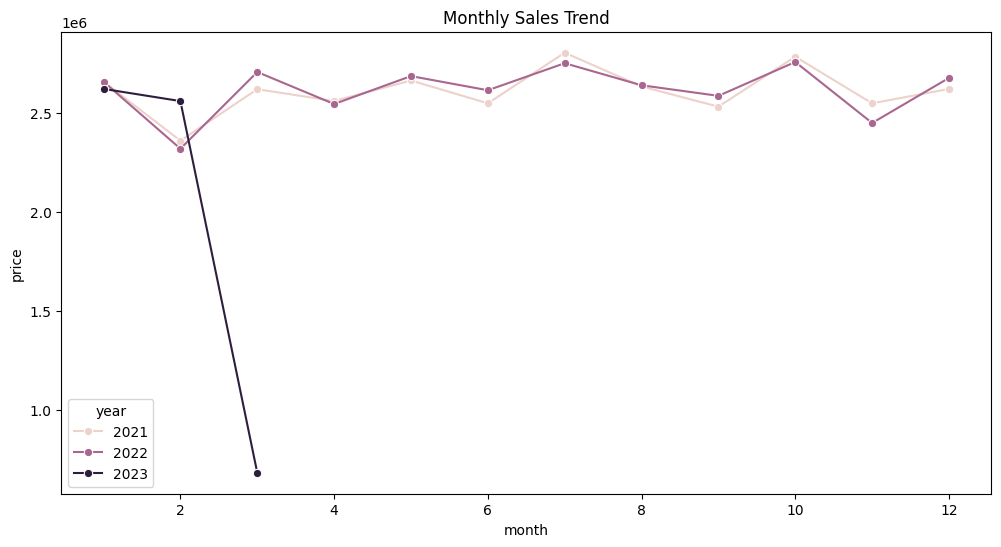

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trend
monthly_sales = df.groupby(['year', 'month'])['price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='price', hue='year', marker='o')
plt.title("Monthly Sales Trend")
plt.show()


**Key Findings**



The monthly sales trend reveals peak sales months, helping to identify seasonal shopping patterns.Sales fluctuations indicate the impact of holidays, promotions, or economictrends on customer spending.






*   ***Top Selling Categories***




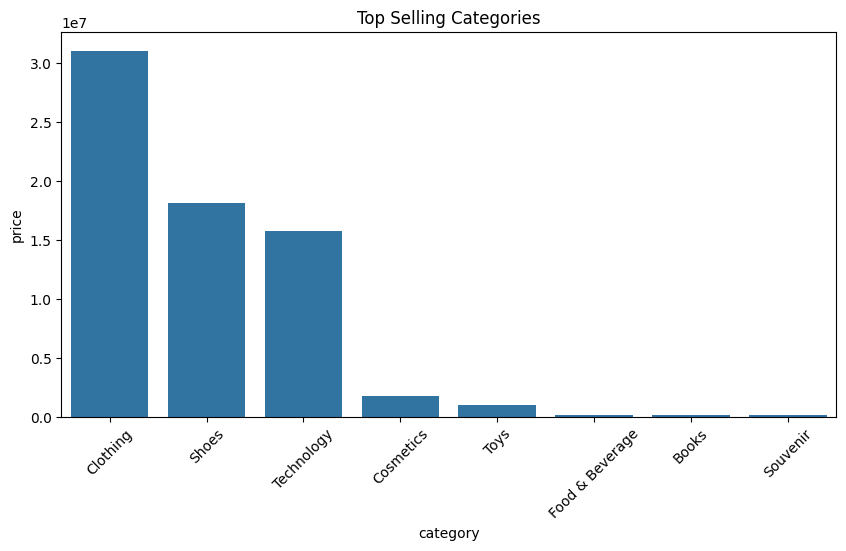

In [ ]:
# Category-wise Sales
category_sales = df.groupby('category')['price'].sum().reset_index().sort_values(by='price', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=category_sales, x='category', y='price')
plt.xticks(rotation=45)
plt.title("Top Selling Categories")
plt.show()

**Key Findings**

Some product categoriescontribute significantly to overall revenue. Identifying fast-moving vs.slow-moving categories helps in inventory management and marketing strategies.




*   ***Customer Purchasing Behavior***




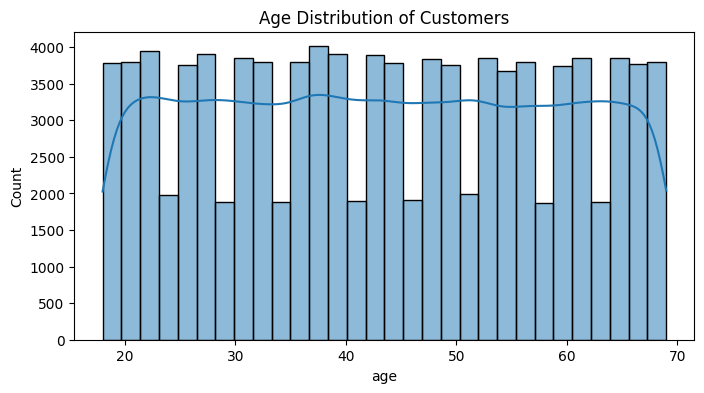

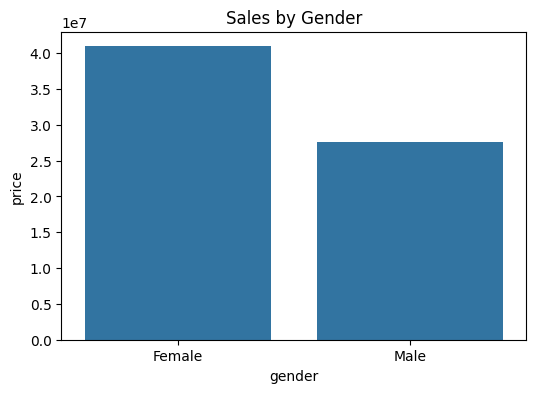

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()

# Sales by Gender
gender_sales = df.groupby('gender')['price'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_sales, x='gender', y='price')
plt.title("Sales by Gender")
plt.show()

**Key Findings**

Age Distribution: The dataset highlights which age groups contribute most to the business.

Gender-Based Sales: Sales are analyzed based on gender, revealing possible targeted marketing opportunities.

Regional Sales: Sales vary across different regions, helping businesses optimize supply chains and store locations.




*  ***Preferred Payment Methods***






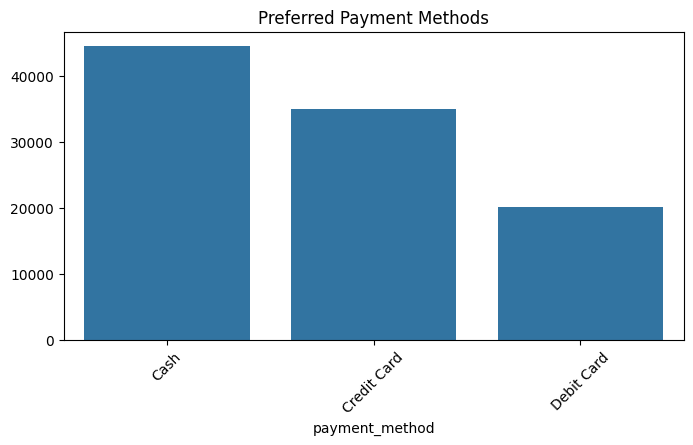

In [ ]:
payment_counts = df['payment_method'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xticks(rotation=45)
plt.title("Preferred Payment Methods")
plt.show()


**Key Findings**

Some payment methods are more popular among customers, which can guide strategies for payment promotions and partnerships. If digital payments dominate, retailers may want to invest more in seamless online transactions.

Store Type Performance

If multiple store types (e.g., mall stores vs. standalone stores) exist, sales differences help businesses decide where to expand or optimize operations.





*  ***Heatmap for correlations***




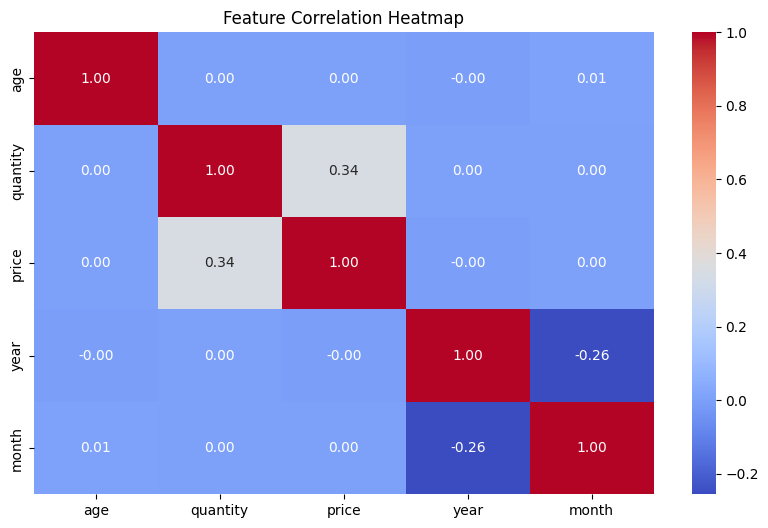

In [ ]:
# Handling non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

**Key Findings**

Correlation Between Features

A heatmap analysis reveals relationships between variables (e.g., age vs. spending, region vs. product preference). Understanding these correlations helps in personalized marketing and dynamic pricing strategies.



*    ***Sales distribution by category***

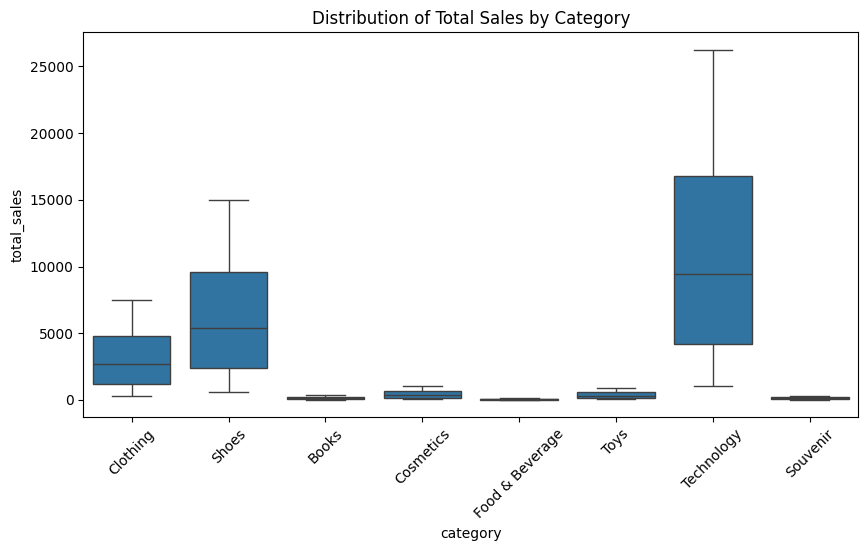

In [ ]:
# Calculate total sales for each transaction
df['total_sales'] = df['quantity'] * df['price']

# Now create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='total_sales', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Total Sales by Category")
plt.show()

**Key Findings**


Some product categories generate most of the revenue, while others underperform. Focus on best-selling categories and offer discounts on slow-moving products.



*  ***Customer Segmentation by Spending***

In [ ]:
# Calculate total spending per customer
customer_spending = df.groupby('customer_id')['total_sales'].sum().reset_index()

# Define spending segments
customer_spending['spending_segment'] = pd.qcut(customer_spending['total_sales'], q=3, labels=['Low', 'Medium', 'High'])


In [ ]:
# Define spending segments (e.g., low, medium, high)
customer_spending['spending_segment'] = pd.qcut(customer_spending['total_sales'],
                                                q=3, labels=['Low', 'Medium', 'High'])

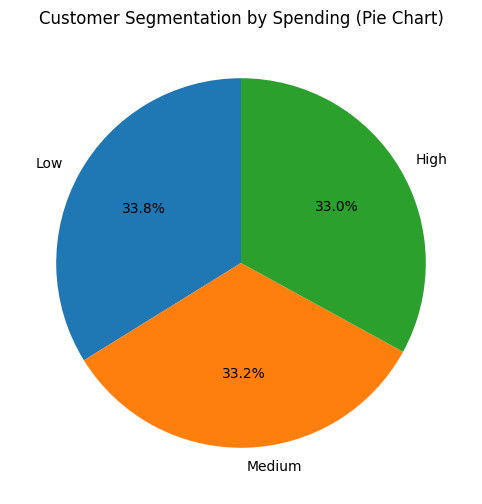

In [ ]:
# Analyze segment distribution
# Calculate segment proportions
segment_proportions = customer_spending['spending_segment'].value_counts(normalize=True)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(segment_proportions, labels=segment_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Segmentation by Spending (Pie Chart)")
plt.show()


**Key Findings**

High spenders prefer premium products, while budget-conscious customers respond to discounts. Implement VIP loyalty programs and targeted promotions to boost sales.


*  ***Analyze Sales by Day of Week and Hour***

<ipython-input-69-24d9e4e261c8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_of_week', y='total_sales', data=df, estimator='sum', ci=None)


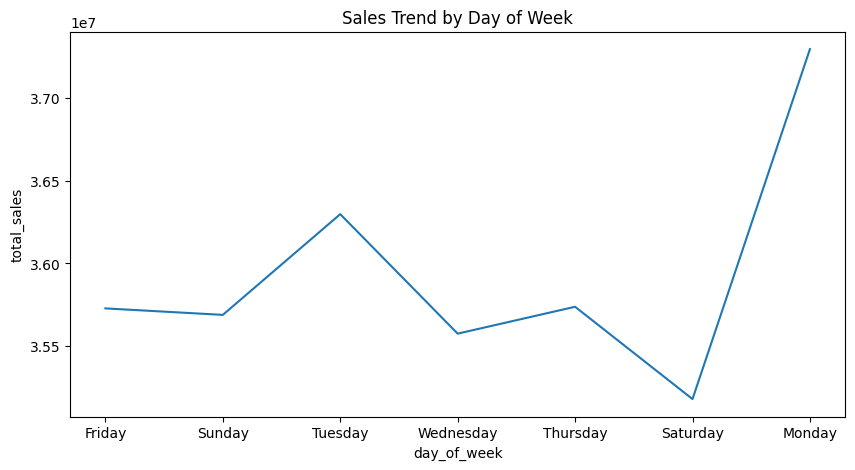

In [ ]:

# Extract hour from invoice date
df['hour'] = df['invoice_date'].dt.hour

# Analyze sales trend by day of week
plt.figure(figsize=(10, 5))
sns.lineplot(x='day_of_week', y='total_sales', data=df, estimator='sum', ci=None)
plt.title("Sales Trend by Day of Week")
plt.show()

**Key Findings**

Weekends and evenings have higher sales, while mid-week sales are lower.
Offer weekday discounts and adjust staffing during peak hours.

***Total sales by hour***

hour             int32
total_sales    float64
dtype: object
hour           0
total_sales    0
dtype: int64


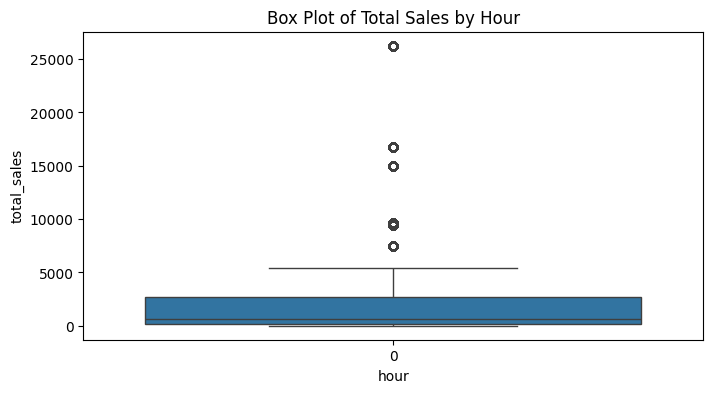

In [ ]:
# Verify data types
print(df[['hour', 'total_sales']].dtypes)

# Check for missing values
print(df[['hour', 'total_sales']].isnull().sum())

# Check for invalid values (e.g., outliers)
plt.figure(figsize=(8, 4))
sns.boxplot(x='hour', y='total_sales', data=df)
plt.title("Box Plot of Total Sales by Hour")
plt.show()



*  ***Analyze Product Popularity and Trends***





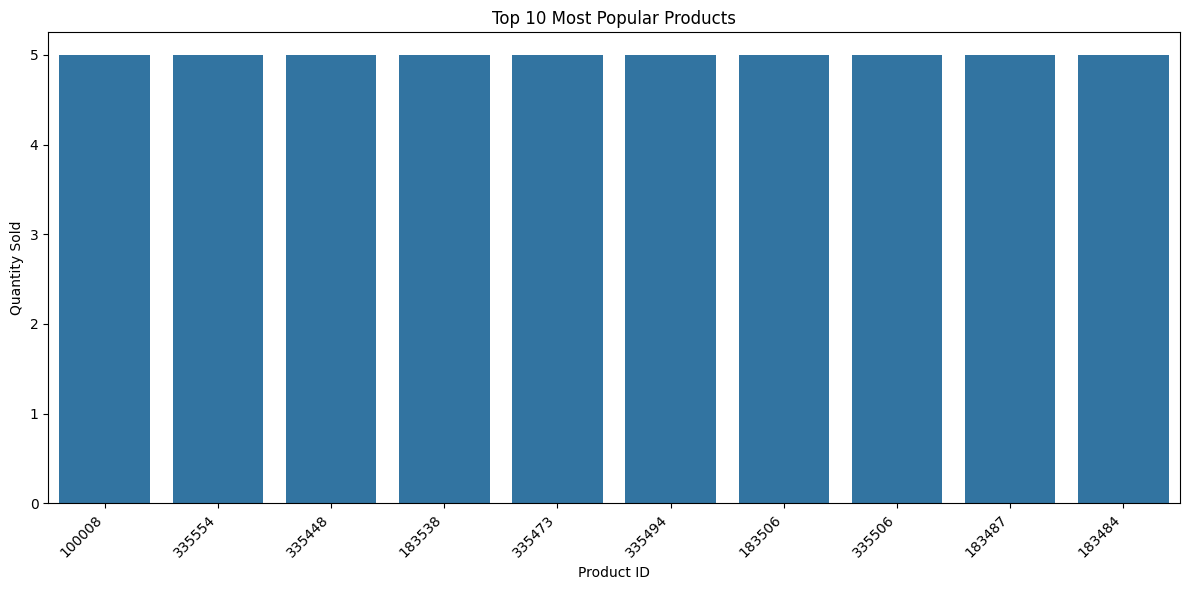

In [ ]:
# Plot the top 10 most popular products
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='quantity', data=product_popularity.head(10))
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Key Findings**

Certain products sell better in specific seasons.

Stock up on popular products and bundle frequently purchased items together.


**Final Conclusion & Recommendations**

* Seasonal Sales Strategies

Increase inventory and promotions during peak sales months.
Offer seasonal discounts to boost sales during low seasons.

* Product Optimization

Focus on best-selling categories and reduce inventory for underperforming products.
Consider cross-selling strategies for frequently purchased product combinations.

* Customer-Centric Marketing

Use demographic insights to create personalized campaigns targeting high-spending age groups and genders.
Implement regional promotions based on geographic sales patterns.

* Payment & Checkout Optimization

Promote the most popular payment methods to enhance customer convenience.
Consider offering discounts for digital payments if online transactions dominate.

* Store Expansion & Resource Allocation

Allocate more resources to high-performing regions and store types.
Optimize staffing and supply chain for low-performing stores.

**Final Thought**

The analysis provides valuable insights that can help the retail business make data-driven decisions, improve customer satisfaction, optimize inventory, and boost revenue. Implementing these strategies will lead to better business performance and growth. 🚀